In [2]:
# Work well with small datasets 
# Optimization can reduce error with the samll quantity only unlike to decision tree

import pandas as pd # Used to load and manipulate the data and one hot encoding
import numpy as np # Data manipulation
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # Scale and centre the data
from sklearn.svm import SVC #Importing support vector machine for classification
from sklearn.model_selection import GridSearchCV #Used for the cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA # To perform PCA and draw the plot of the data


In [5]:
df = pd.read_excel('default of credit card clients.xls', header = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.rename({'default payment next month': 'default'}, axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.drop('ID', axis = 'columns', inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [15]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [47]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [48]:
len(df)

30000

In [49]:
df_nomissing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [50]:
df_nomissing['SEX'].unique()

array([2, 1], dtype=int64)

In [51]:
len(df_nomissing)

29932

In [53]:
df_nodefault = df_nomissing.loc[df_nomissing['default'] == 0]
df_default = df_nomissing.loc[df_nomissing['default'] == 1]

In [55]:
df_nodefault_sampled = resample(df_nodefault, replace=False, n_samples = 1000, random_state = 42)
len(df_nodefault_sampled)

1000

In [56]:
df_default_sampled = resample(df_default, replace=False, n_samples = 1000, random_state = 42)
len(df_nodefault_sampled)

1000

In [57]:
pd_downsample = pd.concat([df_nodefault_sampled, df_default_sampled])
len(pd_downsample)


2000

In [67]:
X = pd_downsample.iloc[:, :-1]
Y = pd_downsample.iloc[:, -1]
len(Y)

2000

In [68]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [71]:
X_encoded = pd.get_dummies(X, columns = ['EDUCATION', 'MARRIAGE', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6' ])

In [72]:
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [75]:
# RBF assumes that data are centered and scaled 
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state = 42)
X_train_scaled = scale(X_train) # Center to the mean and component wise scale to unit variance.
X_test_scaled = scale( X_test)

In [76]:
clf_svm = SVC(random_state =42)
clf_svm.fit(X_train_scaled, Y_train)

SVC(random_state=42)

C:\Users\RuturajMane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.698

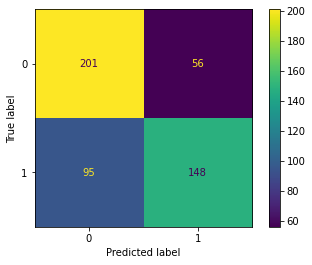

In [78]:
plot_confusion_matrix(clf_svm, X_test_scaled, Y_test)
clf_svm.score(X_test_scaled, Y_test)

In [85]:
param_grid = [{'C' : [0.5, 1, 10, 100]}, {'gamma' : ['scale', 1, 0.1, .001, .0001] }, {'kernel':['rbf']}]

optimal_param = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 2)


In [86]:
optimal_param.fit(X_train,  Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ..............................................C=0.5; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100]},
                         {'gamma': ['scale', 1, 0.1, 0.001, 0.0001]},
                         {'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [87]:
print(optimal_param.best_params_)

{'C': 100}


In [88]:
clf_svm = SVC(random_state = 42, C = 100, gamma = 0.001)


In [89]:
clf_svm.fit(X_train_scaled, Y_train)

SVC(C=100, gamma=0.001, random_state=42)

C:\Users\RuturajMane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.704

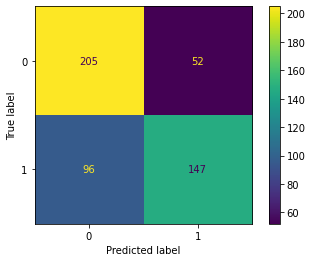

In [90]:
plot_confusion_matrix(clf_svm, X_test_scaled, Y_test)
clf_svm.score(X_test_scaled, Y_test)